# Logistic Regression on the Titanic Dataset

I will be analysing the dataset Titanic from Kaggle found here: https://www.kaggle.com/c/titanic/data?select=train.csv

The dataset has been split into 2: 'train.csv' and 'test.csv'. I will be training the model using the 'train.csv' dataset. The dataset 'test.csv' will contain the same columns as 'train.csv' except for the column 'Survived.' I will use the model trained by 'train.csv' to create predictions whether passengers survived for the dataset 'test.csv.'

I will first explore the dataset using Matplotlib and Seaborn and then I will build a Logistic Regression Model first using Scikit-Learn and then purely from Numpy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

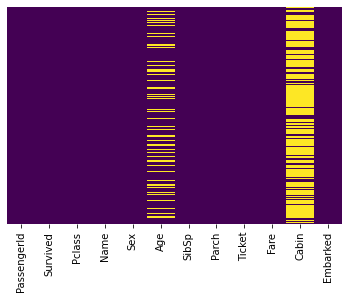

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It appears that the 'Age' coloumn is missing about 20% of its values and the 'Cabin' column is missing most of its data. The model cannot be trained with any missing values. To use the 'Age' column, dummy variables can be used instead like the mean age of all passengers.

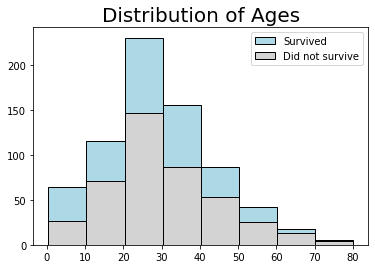

In [7]:
plt.hist(df.Age, bins=8, ec='black', histtype='bar', stacked=True, color='lightblue',label='Survived')
plt.hist(df.Age[df['Survived']==0], bins=8, ec='black',  histtype='bar', stacked=True, range=(df.Age.min(),df.Age.max()), color='lightgrey',label='Did not survive')

plt.title('Distribution of Ages', fontsize=20)
plt.legend()
plt.rcParams["figure.figsize"] = (11,7)

We can see here that the majority of the passengers were aged between 20 and 40 years old. Furthermore, the proportion between survived and did not survive decreased as the age group increased.

Text(0.5, 0, '')

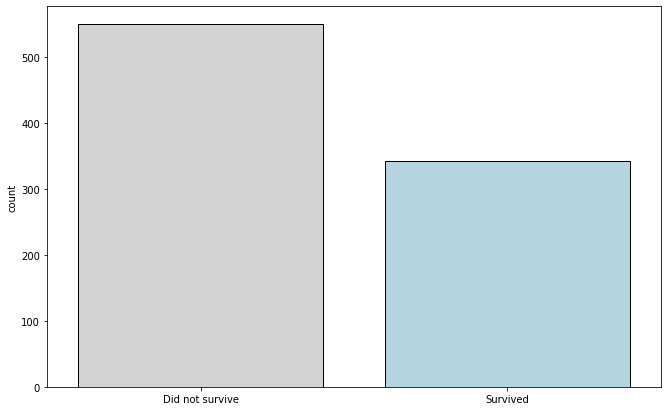

In [8]:
ax = sns.countplot(x='Survived',data=df,palette=["#D3D3D3",'#ADD8E6'],ec='black')
ax.set_xticklabels(['Did not survive', 'Survived'])
ax.set_xlabel('')

Unfortunately, there were a greater proportion of those that did not survive, where half of the value of those that did not survive, survived.

Text(0.5, 0, '')

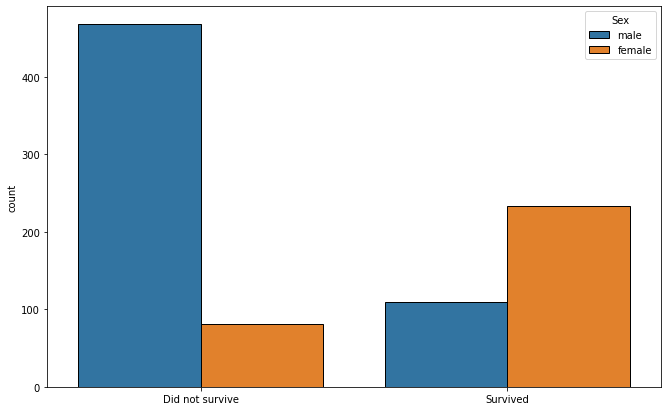

In [9]:
ax = sns.countplot(x='Survived',hue='Sex',data=df,ec='black')
ax.set_xticklabels(['Did not survive','Survived'])
ax.set_xlabel('')

Text(0.5, 0, '')

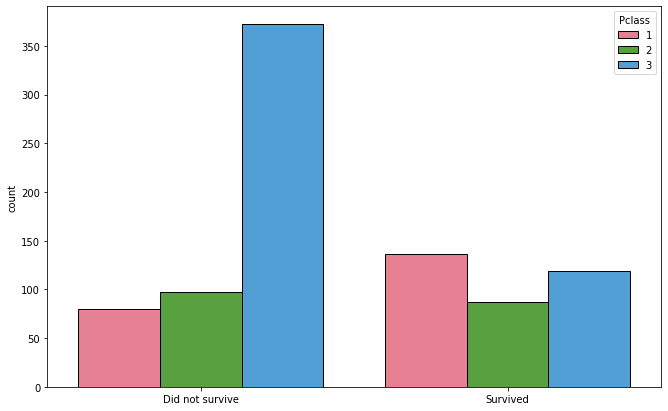

In [10]:
ax = sns.countplot(x='Survived',hue='Pclass',data=df,ec='black',palette='husl')
ax.set_xticklabels(['Did not survive','Survived'])
ax.set_xlabel('')

Pclass 3 represented the cheapest fare and poorest cabin quality. Pclass 3 was the group the contained the greatest number of individuals. Unfortunately, as seen here, Pclass 3 had the greatest amount of deaths. Looking at Pclass 1 & 2, more than half of the group survived for Pclass 1 and about half survived for Pclass 2. However, for Pclass 3, only about 20% of the group survived. 

## Data Cleaning

This section involves me transforming the data to be usable in training the model. Columns such as 'Sex' which contain object type values cannot be used to train the model. Hence I will need to transform the data to float or int types.

In [11]:
df.Sex = df.Sex.replace({'female':0, 'male':1})

In [12]:
def transform_embarked(x):
    
    if x == 'S':
        return 0
    
    elif x == 'C':
        return 1
    
    else:
        return 2

In [13]:
df.Embarked = df.Embarked.apply(transform_embarked)

In [14]:
print('Mean Age of Pclass 1 are ' + str(int(df.Age[df['Pclass']==1].mean())))
print('Mean Age of Pclass 2 are ' + str(int(df.Age[df['Pclass']==2].mean())))
print('Mean Age of Pclass 3 are ' + str(int(df.Age[df['Pclass']==3].mean())))

Mean Age of Pclass 1 are 38
Mean Age of Pclass 2 are 29
Mean Age of Pclass 3 are 25


In [15]:
def add_age(column):
    
    Age = column[0]
    Pclass = column[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 29
        
        elif Pclass == 3:
            return 25
        
    else:
        return Age

In [16]:
df.Age = df[['Age', 'Pclass']].apply(add_age,axis=1)

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


For columns 'Sex' and 'Embarked' I have replaced their string values to corresponding int values. For example, for 'Sex', I have replaced female with 0 and male with 1.

For the column 'Age', I have chosen to input the mean of the corresponding 'Pclass' of the passenger. For example, a passenger with missing age values, who has a Pclass of 2 will be given the age of 29.

## Training a Logistic Regression Model (using Scikit-Learn)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y = df.Survived

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.33)

I have chosen to create a validation dataset by splitting 'train.csv' to X_train which holds 67% of the dataset and the X_validation which holds the remaining 33% of the dataset.

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 272 to 638
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Sex          596 non-null    int64  
 3   Age          596 non-null    float64
 4   SibSp        596 non-null    int64  
 5   Parch        596 non-null    int64  
 6   Fare         596 non-null    float64
 7   Embarked     596 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 41.9 KB


In [21]:
y_train.shape

(596,)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression()

In [24]:
logmodel.fit(X_train, y_train)

/Users/danelindiongco/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
predictions = logmodel.predict(X_validation)

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       197
           1       0.67      0.69      0.68        98

    accuracy                           0.78       295
   macro avg       0.76      0.76      0.76       295
weighted avg       0.79      0.78      0.78       295



Here the model has achieved an accuracy of 80% compared to the validation dataset.

## Training a Logistic Regression Model (using Numpy)

 First I will convert the panda dataframes into numpy arrays

In [28]:
X_train_n = X_train.values
X_validation_n = X_validation.values
y_train_n = y_train.values.reshape(X_train_n.shape[0],1)
y_validation_n = y_validation.values.reshape(X_validation_n.shape[0],1)

In [29]:
print('Training set has shape: ' + str(X_train_n.shape))
print('Validation set has shape: ' + str(X_validation_n.shape))

print(y_train_n.shape)
print(y_validation_n.shape)

Training set has shape: (596, 8)
Validation set has shape: (295, 8)
(596, 1)
(295, 1)


This step involves preprocessing the data by subtracting the mean from the dataset and then dividing by the standard deviation.

In [30]:
X_train_n = (X_train_n - X_train_n.mean(axis=1).reshape(596,1))/np.std(X_train_n,axis=1).reshape(596,1)
X_validation_n = (X_validation_n - X_validation_n.mean(axis=1).reshape(295,1))/np.std(X_validation_n,axis=1).reshape(295,1)
print(X_train_n.shape)
print(X_validation_n.shape)

(596, 8)
(295, 8)


In [31]:
def sigmoid(z): #This function finds the sigmoid of the array. It will be used to find the activation function of 'z = Xw + b'.
    a = 1/(1+np.exp(-z))
    
    return a

In [32]:
def initialise_with_zero(dims): 
    
    w = np.zeros((dims,1))
    b = 0.0
    
    return w, b

In [33]:
def propagate(w, b, X, Y): #This function finds the activation function and cost of the model using forward propagation.
    #The results are then used to calculate the gradients by backward propagation.
    
    #Forward propagation
    m = X.shape[0]
    
    a = sigmoid(np.dot(X,w) + b) #calculates activation
    
    cost = (-1/m) * np.sum((Y * np.log(a)) + ((1-Y) * np.log(1-a)))
    
    #Gradients initialised by Backward propagation
    dw = np.dot(X.T,(a-Y))/m
    
    db = np.sum(a-Y)/m

    
    cost = np.squeeze(np.array(cost))
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [34]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009): 
    #In this function we conduct gradient descent
    
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    w_list = []
    dw_list = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)     
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        if i % 10000 == 0:
            costs.append(cost)
            w_list.append(w[0])
            dw_list.append(dw[0])
            print ("Cost after iteration %i: %f" %(i, cost))
            
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
        
    return params, grads, costs, w_list, dw_list

In [35]:
def predict(w, b, X):
    #This funtion is used to create a list of predictions on the X values using the parameters w & b
    
    m = X.shape[0]
    y_hat = np.zeros((m,1))
    w = w.reshape(X.shape[1], 1)
    
    A = sigmoid(np.dot(X,w)+b)
    
    for i in range(A.shape[0]):
        
        if A[i,0] > 0.5:
            y_hat[i,0] = int(1)
        else:
            y_hat[i,0] = int(0)
    
    y_hat = y_hat.round(decimals=0).astype(object)
    return y_hat

In [36]:
def logistic_regression_model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
    #Merging all the functions together
    
    w, b = initialise_with_zero(X_train_n.shape[1])

    params, grads, costs, w_list, dw_list = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = params['w']
    b = params['b']
    
    prediction_train = predict(w, b, X_train)
    prediction_validation = predict(w, b, X_test)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(prediction_validation - Y_test)) * 100))
    
    d = {"costs": costs,
         "prediction_validation": prediction_validation, 
         "prediction_train" : prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations, 
         "w_list" : w_list,
         "dw_list" : dw_list}
    
    return d

In [37]:
logmodel_n = logistic_regression_model(X_train_n, y_train_n, X_validation_n, y_validation_n, num_iterations=1000001, learning_rate=1)

Cost after iteration 0: 0.693147
Cost after iteration 10000: 0.634950
Cost after iteration 20000: 0.624786
Cost after iteration 30000: 0.619156
Cost after iteration 40000: 0.615570
Cost after iteration 50000: 0.613115
Cost after iteration 60000: 0.611356
Cost after iteration 70000: 0.610057
Cost after iteration 80000: 0.609078
Cost after iteration 90000: 0.608328
Cost after iteration 100000: 0.607745
Cost after iteration 110000: 0.607288
Cost after iteration 120000: 0.606927
Cost after iteration 130000: 0.606639
Cost after iteration 140000: 0.606409
Cost after iteration 150000: 0.606224
Cost after iteration 160000: 0.606075
Cost after iteration 170000: 0.605953
Cost after iteration 180000: 0.605855
Cost after iteration 190000: 0.605774
Cost after iteration 200000: 0.605709
Cost after iteration 210000: 0.605655
Cost after iteration 220000: 0.605611
Cost after iteration 230000: 0.605574
Cost after iteration 240000: 0.605545
Cost after iteration 250000: 0.605520
Cost after iteration 26000

This model has achieved an accuracy of 75.3% using the validation dataset.

In [38]:
logmodel_n['prediction_train']

array([[0.0],
       [0.0],
       [0.0],
       [1.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [1.0],
       [1.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [1.0],
       [1.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
      

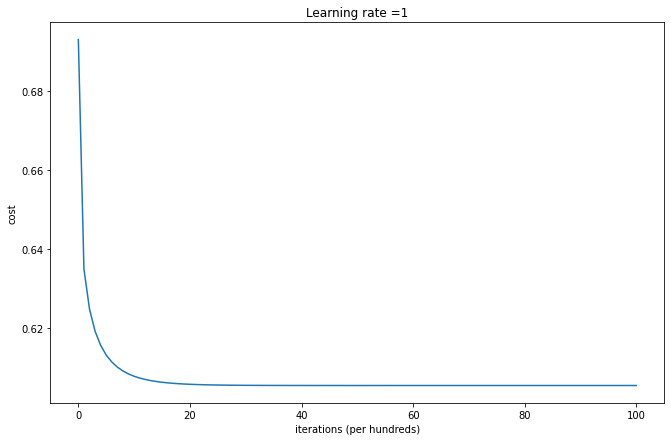

In [39]:
costs = np.squeeze(logmodel_n['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logmodel_n["learning_rate"]))
plt.show()

Here we can see the cost fall and then plateau after 1,000,000 iterations and a learning rate of 1.

## Predicting the test values

In [40]:
df_test = pd.read_csv('test.csv')

In [41]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
#Transforming the data
df_test.Sex = df_test.Sex.replace({'female':0, 'male':1})

df_test.Embarked = df_test.Embarked.apply(transform_embarked)

df_test.Age = df_test[['Age', 'Pclass']].apply(add_age,axis=1)

In [43]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0


In [44]:
X_s = df_test.drop(columns=['Name', 'Ticket', 'Cabin'])

<AxesSubplot:>

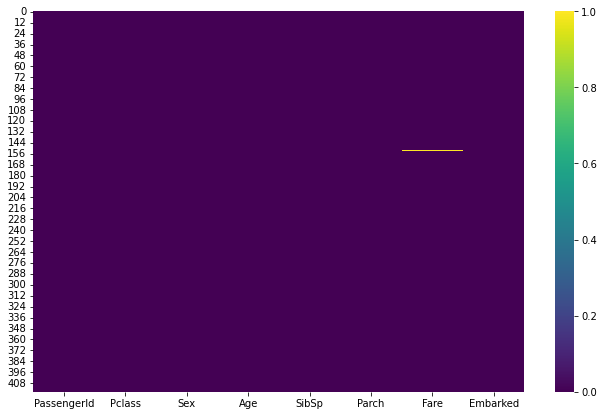

In [45]:
#Turns out there is a missing value for fare
sns.heatmap(X_s.isnull(),cmap='viridis')

In [46]:
#To analyse the case of the missing fare value
X_s[X_s.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,1,60.5,0,0,NaN,0


In [47]:
df_temp = df[df['Pclass']==3]
df_temp.Fare[df['Embarked']==0].mean() #The mean of all Pclass passengers going to destination S

14.644083002832863

In [48]:
#The null value has been replaced with 14.6
X_s.Fare[X_s.Fare.isnull()] = 14.6

/var/folders/2_/08fmp8hd5sn41mj0flx0plxh0000gn/T/ipykernel_27390/2736077735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_s.Fare[X_s.Fare.isnull()] = 14.6


<AxesSubplot:>

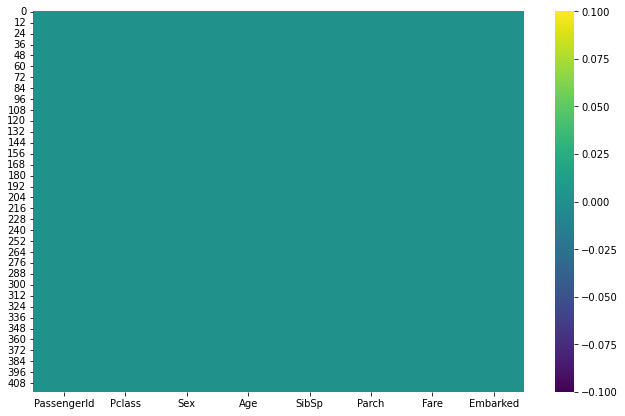

In [49]:
#Double checking to see if there are any more null values
sns.heatmap(X_s.isnull(),cmap='viridis')

In [50]:
#Creating predictions using model trained via Scikit-learn
prediction_test_s = logmodel.predict(X_s)

In [51]:
#Creates a numpy array for X_s dataframe then transform the data
X_n = X_s.values
X_n = (X_n - X_n.mean(axis=1).reshape(418,1))/np.std(X_n,axis=1).reshape(418,1)

In [52]:
#Produces the prediction array from the Numpy model
prediction_test_n = predict(logmodel_n['w'], logmodel_n['b'], X_n)
prediction_test_n = np.squeeze(prediction_test_n.astype(int))

In [53]:
#To create a dataframe including only PassengerId
submission_s = df_test.drop(['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Name','Ticket','Cabin'],axis=1)
submission_n = df_test.drop(['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Name','Ticket','Cabin'],axis=1)

In [54]:
submission_s 

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [55]:
submission_s['Survived'] = prediction_test_s.tolist()
submission_s.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [56]:
submission_s.to_csv('submission using Scikit',index=False) #Submission using the Scikit-learn model

In [57]:
submission_n['Survived'] = prediction_test_n.tolist()
submission_n.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [58]:
submission_n.to_csv('submission using Numpy',index=False) #Submission using the Numpy model

## Results

The model made using Scikit-learn had a score of 77%

The model made using Numpy had a score of 64%

Things to try in the future:
    
    For both models, I could've added regularization to avoid overfitting